In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float , curLine)
        dataMat.append(fltLine)
    
    return dataMat

In [3]:
def distEclud(vecA , vecB):
    return sqrt(sum(power(vecA - vecB , 2)))

def randCent(dataSet , k):
    n = shape(dataSet)[1]
    
    centroids = mat(zeros((k , n)))
    for j in range(n):
        minJ = min(dataSet[: , j])
        rangeJ = float(max(dataSet[: , j]) - minJ)
        centroids[: , j] = minJ + rangeJ*random.rand(k , 1)
    
    return centroids

In [7]:
datMat = mat(loadDataSet('../MLiA_SourceCode/Ch10/testSet.txt'))

randCent(datMat , 2)

matrix([[-0.65810088,  1.85481733],
        [ 1.72213343,  2.59757328]])

In [8]:
distEclud(datMat[0] , datMat[1])

5.184632816681332

In [9]:
def kMeans(dataSet , k , distMeas = distEclud , createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet , k)
    clusterChanged = True
    
    while clusterChanged:
        clusterChanged = False
        
        for i in range(m):
            minDist = inf
            minIndex = -1
            
            for j in range(k):
                distJI = distMeas(centroids[j , :] , dataSet[i , :])
                if distJI<minDist:
                    minDist = distJI
                    minIndex = j
            
            if clusterAssment[i , 0] != minIndex:
                clusterChanged = True
            
            clusterAssment[i , :] = minIndex , minDist**2
        
        print(centroids)
        
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[: , 0].A == cent)[0]]
            centroids[cent , :] =mean(ptsInClust , axis = 0)
    
    return centroids , clusterAssment
            

In [10]:
myCentroids , clustAssing = kMeans(datMat , 4)

[[ 3.82387939 -1.23093816]
 [-0.36772868 -3.88579006]
 [ 0.78559468 -0.86158956]
 [-1.47967373  4.16444817]]
[[ 3.32431968 -1.18867445]
 [-2.79969165 -3.01951378]
 [ 1.79594167 -0.140597  ]
 [-0.70059397  3.13642319]]
[[ 3.11052774 -2.61694289]
 [-3.19984738 -2.96423548]
 [ 2.77833975  1.99367675]
 [-0.70059397  3.13642319]]
[[ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.75938889  3.00328428]
 [-2.10769386  2.90281805]]
[[ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]]


In [12]:
288*10

2880

In [18]:
def biKmeans(dataSet , k , distMeas = distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m , 2)))
    centroid0 = mean(dataSet , axis=0).tolist()[0]
    centList = [centroid0]
    
    for j in range(m):
        clusterAssment[j , 1]= distMeas(mat(centroid0) , dataSet[j,:])**2
    
    while (len(centList)<k):
        lowerSSE = inf
        
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A == i)[0] , :]
            
            centroidMat , splitClustAss = kMeans(ptsInCurrCluster , 2 , distMeas)
            
            sseSplit = sum(splitClustAss[:,1])
            
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            
            print('ssesplit , ssenotsplit:' , sseSplit , sseNotSplit)
            
            if (sseSplit+sseNotSplit)<lowerSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowerSSE = sseSplit+sseNotSplit
            
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0] , 0]=len(centList)
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0] , 0]=bestCentToSplit
        
        print('the bestcenttosplit:' , bestCentToSplit)
        print('length of bestclustass' , len(bestClustAss))
        
        centList[bestCentToSplit] = bestNewCents[0 , :]
        centList.append(bestNewCents[1,:])
        clusterAssment[nonzero(clusterAssment[:,0].A==bestCentToSplit)[0] , :]=bestClustAss
    
    return (centList) , clusterAssment

In [19]:
datMat3 = mat(loadDataSet('../MLiA_SourceCode/Ch10/testSet2.txt'))

In [20]:
centList , myNewAssments = biKmeans(datMat3 , 3)

[[-2.90005492 -1.88055064]
 [ 1.17949002 -2.51948876]]
[[-2.55366267  1.87336607]
 [ 1.80259173  0.69511888]]
[[-2.67025108  2.269544  ]
 [ 1.63694034  0.47946306]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
('ssesplit , ssenotsplit:', 570.7227574246755, 0.0)
('the bestcenttosplit:', 0)
('length of bestclustass', 60)
[[-1.36216881  2.4807584 ]
 [-2.00894037  1.52043561]]
[[-2.76071193  3.74297764]
 [-3.38292467  2.3543125 ]]
[[-2.80416875  3.91101575]
 [-3.16218625  2.44942162]]
('ssesplit , ssenotsplit:', 27.19366783626188, 532.6598067890178)
[[-0.04743563 -0.24204694]
 [ 0.72966066  0.29506591]]
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
('ssesplit , ssenotsplit:', 68.68654812621844, 38.06295063565756)
('the bestcenttosplit:', 1)
('length of bestclustass', 40)


In [21]:
centList

[matrix([[-2.94737575,  3.3263781 ]]),
 matrix([[-0.45965615, -2.7782156 ]]),
 matrix([[2.93386365, 3.12782785]])]

In [27]:
def distSLC(vecA , vecB):
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180)*cos(pi*(vecB[0,0]-vecA[0,0])/180)
    
    return arccos(a+b)*6371.0


In [28]:
import matplotlib

In [29]:
import matplotlib.pyplot as plt

In [36]:
def clusterClubs(numClust = 5):
    datList = []
    for line in open('../MLiA_SourceCode/Ch10/places.txt'):
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]) , float(lineArr[3])])
    
    datMat = mat(datList)
    myCentroids , clustAssing = biKmeans(datMat , numClust , distMeas=distSLC)
    
    fig = plt.figure()
    rect = [0.1 , 0.1 , 0.8 , 0.8]
    scatterMarkers = ['s','o','^','8','p',
                      'd','v','h','>','<']
    
    axprops = dict(xticks=[] , yticks=[])
    
    ax0 = fig.add_axes(rect , label='ax0' , **axprops)
    imgP = plt.imread('../MLiA_SourceCode/Ch10/Portland.png')
    ax0.imshow(imgP)
    ax1 = fig.add_axes(rect , label='ax1' , frameon=False)
    
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[: , 0].A==i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        
        ax1.scatter(ptsInCurrCluster[: , 0].flatten().A[0],
                    ptsInCurrCluster[: , 1].flatten().A[0],
                    marker = markerStyle , s=90)
    
    #ax1.scatter(myCentroids[:,0].flatten.A[0],
    #            myCentroids[:,1].flatten.A[0],marker='+' , s=300)
    
    plt.show()

[[-122.38849758   45.52298698]
 [-122.79636654   45.60748235]]
[[-122.55202429   45.51080603]
 [-122.69665539   45.51353092]]
[[-122.55095081   45.5149589 ]
 [-122.69753113   45.51014305]]
[[-122.54868607   45.51882187]
 [-122.69551477   45.50729503]]
('ssesplit , ssenotsplit:', 3043.263316150597, 0.0)
('the bestcenttosplit:', 0)
('length of bestclustass', 69)
[[-122.6000935    45.4812624 ]
 [-122.46132251   45.4308787 ]]
[[-122.56208315   45.52250274]
 [-122.42811233   45.485694  ]]
('ssesplit , ssenotsplit:', 511.8065376456885, 2191.824427550861)
[[-122.66368469   45.48903047]
 [-122.71148079   45.44390219]]
[[-122.67277615   45.53184654]
 [-122.740992     45.458192  ]]
[[-122.67471037   45.53756246]
 [-122.7288018    45.45886713]]
('ssesplit , ssenotsplit:', 1321.044632394249, 851.4388885997361)
('the bestcenttosplit:', 1)
('length of bestclustass', 39)
[[-122.45705983   45.55526377]
 [-122.54340695   45.4424275 ]]
[[-122.55120806   45.53945741]
 [-122.54538808   45.49183692]]
[[-12

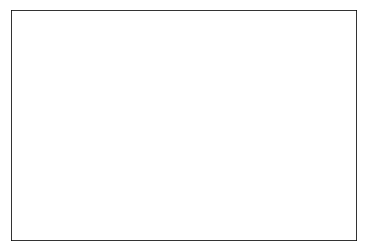

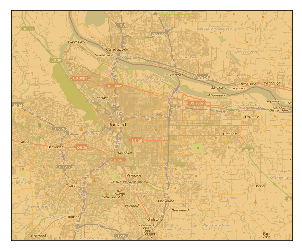

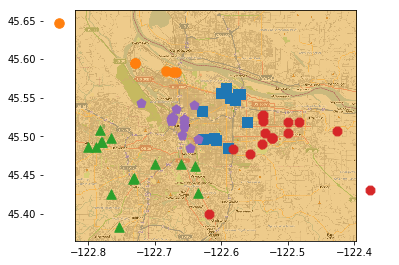

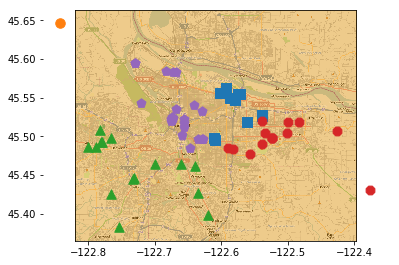

In [37]:
clusterClubs(5)